In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#uploading given csv file
from google.colab import files
uploaded=files.upload()



Saving cancer.csv to cancer.csv


In [ ]:
#Reading the csv file

df=pd.read_csv("cancer.csv")

#show the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Show the information of dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Select the attributes
#Radius mean-> X-axis
#Texture maen-> Y-axis

cluster_attributes = ["radius_mean", "texture_mean"]
X = df[cluster_attributes].values
X.shape
(569, 2)

(569, 2)

In [ ]:
#Initialization of centroids for K means

def initialization_centroids_kmean(X, total_clusters):
 random_indices = np.random.choice(X.shape[0], total_clusters, replace=False)
 centroids_val = X[random_indices]
 return centroids_val

 #Based on centroids assign points to clusters

def cluster_point_assignment(X, centroids_val):
 calculate_distances = np.sqrt(((X - centroids_val[:, np.newaxis])**2).sum(axis=2))
 cluster_point_assignment = np.argmin(calculate_distances, axis=0)
 return cluster_point_assignment

#Update centroids of Kmeans

def update_cluster_centers_kmeans(X, cluster_point_assignments, total_clusters):
 new_centroids_val = np.array([X[cluster_point_assignments == i].mean(axis=0) for i in range(total_clusters)])
 return new_centroids_val

#Kmeans algorithm

def kmeans_algo(X, total_clusters, itr_count):
 centroids_val = initialization_centroids_kmean(X, total_clusters)
 for _ in range(itr_count):
  cluster_assignments_val = cluster_point_assignment(X, centroids_val)
  new_centroids_val = update_cluster_centers_kmeans(X, cluster_assignments_val, total_clusters)
  if np.all(centroids_val == new_centroids_val):
    break
  centroids_val = new_centroids_val
 return cluster_assignments_val, centroids_val

In [ ]:
#Find medoids for Kmedoids algo

def medoid_kmedoid(X, total_clusters):
    random_numbers = np.random.choice(X.shape[0], total_clusters, replace=False)
    medoid_val = X[random_numbers]
    return medoid_val

#Points assignment to medoids

def points_assignment(X, medoid_val):
    eq_distance = np.abs(X - medoid_val[:, np.newaxis])
    cluster_points = np.argmin(eq_distance.sum(axis=2), axis=0)
    return cluster_points

#Update medoids

def new_medoid_val(X, cluster_points, total_clusters):
    updated_medoids = np.array([X[cluster_points == i].mean(axis=0) for i in range(total_clusters)])
    return updated_medoids

#Kmedoid algorithm
def kmedoid_algo(X, total_clusters, itr_count):
    medoid_value = medoid_kmedoid(X, total_clusters)
    for _ in range(itr_count):
        cluster_value = points_assignment(X, medoid_value)
        new_medoid_value = new_medoid_val(X, cluster_value, total_clusters)
        if np.all(medoid_value == new_medoid_value):
            break
        medoid_value = new_medoid_value
    return cluster_value, medoid_value




In [ ]:
np.random.seed(42)

total_clusters = 2
itr_count = 100
kmeans_cluster_value, centroid_kmeans = kmeans_algo(X, total_clusters, itr_count)
kmedoid_cluster_value, centroid_kemdoid = kmedoid_algo(X, total_clusters, itr_count)

<ipython-input-27-0c93369447e4>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points[:, 0],  points[:, 1], label=f'Cluster_Number {k}', cmap='hsv')


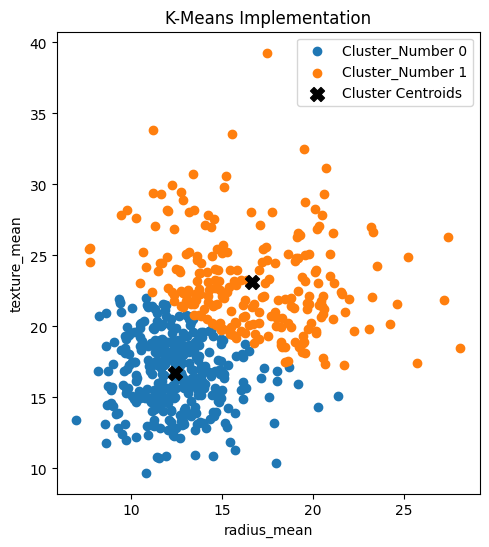

In [ ]:
#Plot K Means algorithm

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for k in range(total_clusters):
    points = X[kmeans_cluster_value == k]
    if len(points) > 0:
        plt.scatter(points[:, 0],  points[:, 1], label=f'Cluster_Number {k}', cmap='viridis')
plt.scatter(centroid_kmeans[:, 0], centroid_kmeans[:, 1], marker='X', s=100, c='black', label='Cluster Centroids')
plt.title("K-Means Implementation")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.plot();


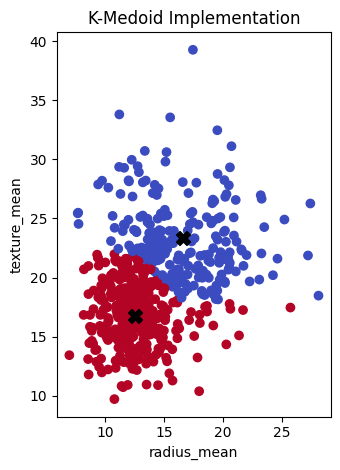

In [ ]:
#Plot K Medoid algorithm

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmedoid_cluster_value, cmap='coolwarm')
plt.scatter(centroid_kemdoid[:, 0], centroid_kemdoid[:, 1], marker='X', s=100, c='black')
plt.title("K-Medoid Implementation")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.tight_layout()
plt.show()

In [ ]:
#Cluster points count (Final output of Assignment)

# number of points in each cluster in K-Mean

no_of_points_kmeans = np.bincount(kmeans_cluster_value)

# number of points in each cluster in K-Medoid
no_of_points_kmedoids = np.bincount(kmedoid_cluster_value)

print("Number of points in cluster 1 and cluster 2 in KMeans:")
print(no_of_points_kmeans)

print("\n\n")

print("Number of points in cluster 1 and cluster 2 in KMedoids:")
print(no_of_points_kmedoids)

Number of points in cluster 1 and cluster 2 in KMeans:
[340 229]



Number of points in cluster 1 and cluster 2 in KMedoids:
[219 350]


[]